In [26]:
import sys
import os
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(project_root)

import pandas as pd 
import numpy as np
from utils import df_operations, NN_preprocessing

from importlib import reload
from matplotlib import pyplot as plt
reload(NN_preprocessing)




masterdata = pd.read_stata('../data/MasterDataExtendStata12.dta')
original_shape = masterdata.shape
data = pd.read_csv('../data/final_data.csv',parse_dates=['dtcol']) # final dataset used on model. Have locations
data = pd.read_csv('../data/final_data.csv',parse_dates=['dtcol'])
data['semepi'] = data['semepi'] + 100   

valid_samples = NN_preprocessing.get_valid_samples(data)

# introduce a small value on traps with the same coordinates to differentiate them
same_coord = NN_preprocessing.same_coord_samples(valid_samples)
for trap in same_coord['narmad'].unique():
    valid_samples.loc[valid_samples['narmad'] == trap, 'latitude'] += np.random.rand()*0.00000001
    valid_samples.loc[valid_samples['narmad'] == trap, 'longitude'] += np.random.rand()*0.00000001


In [28]:
valid_samples

,nplaca,novos,latitude,longitude,narmad,ano,anoepid,semepi,dtcol,GerCat
0,90000140,0.0,-19.974521,-44.057499,901001,2018.0,2018_19,125,2018-06-25,A2
1,90000215,0.0,-19.974521,-44.057499,901001,2014.0,2014_15,139,2014-09-29,A2
2,90000156,0.0,-19.974521,-44.057499,901001,2023.0,2022_23,122,2023-06-05,A2
3,90000012,0.0,-19.974521,-44.057499,901001,2013.0,2013_14,127,2013-07-08,A2
4,90000272,110.0,-19.974521,-44.057499,901001,2015.0,2014_15,113,2015-04-06,A2
...,...,...,...,...,...,...,...,...,...,...
468478,90524372,0.0,-19.793400,-43.978730,909195,2024.0,2023_24,108,2024-02-28,A2
468479,90524384,0.0,-19.793400,-43.978730,909195,2024.0,2024_25,128,2024-07-17,A2
468480,90524382,1.0,-19.793400,-43.978730,909195,2024.0,2024_25,124,2024-06-19,A2
468481,90524385,59.0,-19.793400,-43.978730,909195,2024.0,2023_24,104,2024-01-31,A2


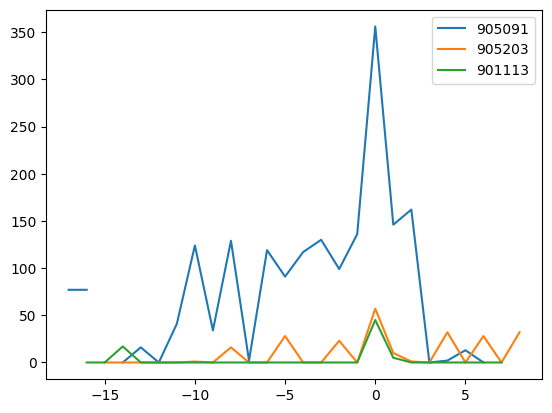

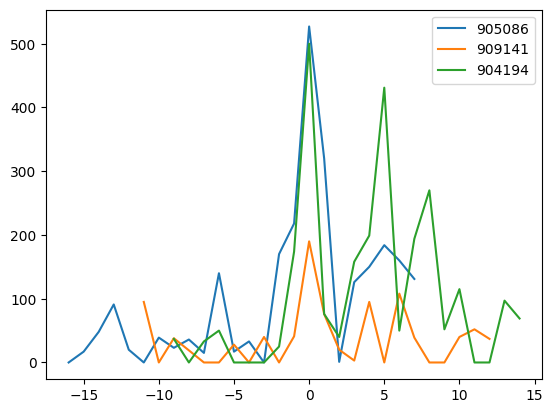

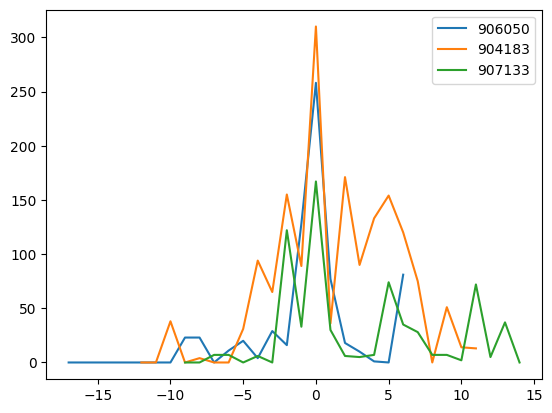

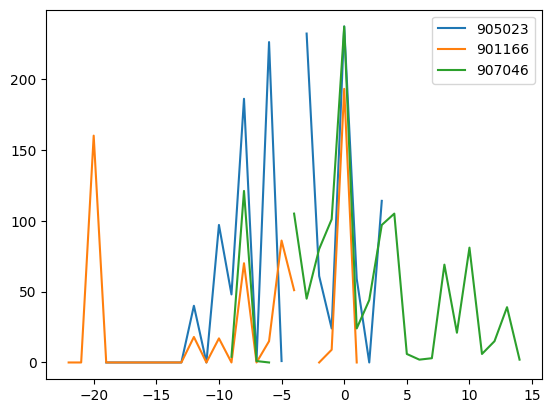

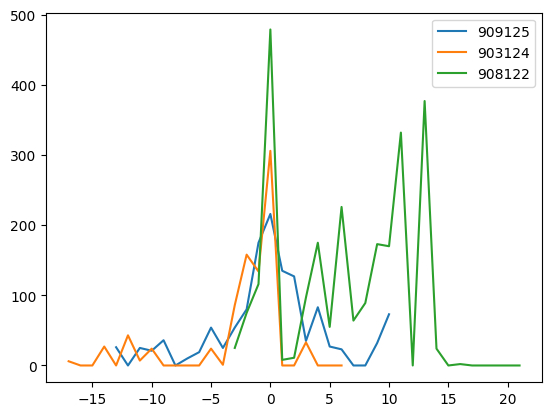

In [24]:
n_samples = 3
anoepid = '2023_24'


for _ in range(5):
    filter_df = valid_samples[valid_samples['anoepid'] == anoepid ].pivot(index=['ano','semepi'],
                                                                            columns='narmad',
                                                                            values='novos')

    filter_df.reset_index(inplace=True,drop=True)
    filter_df =  filter_df.sample(n_samples,axis=1)
    for col in filter_df.columns:
        plot_df = filter_df[col]
        plot_df = align_series(plot_df)
        plot_df.plot(label=col)
    plt.legend()
    plt.show()


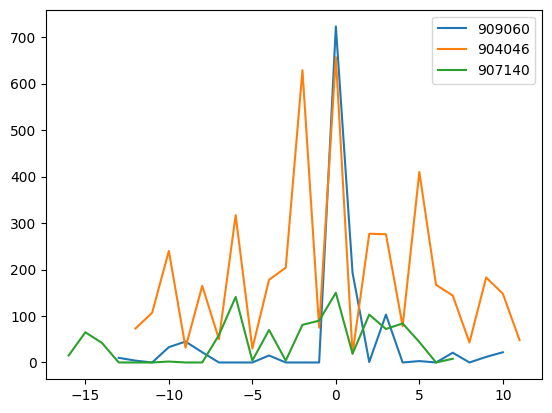

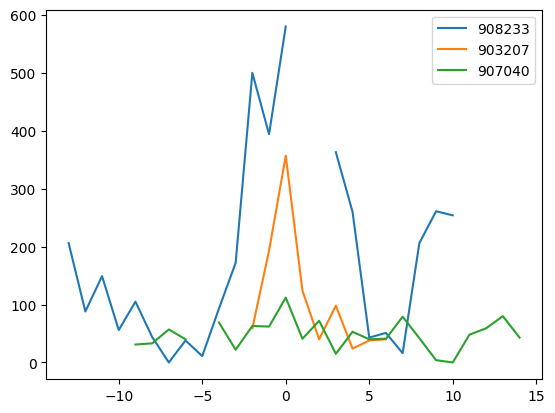

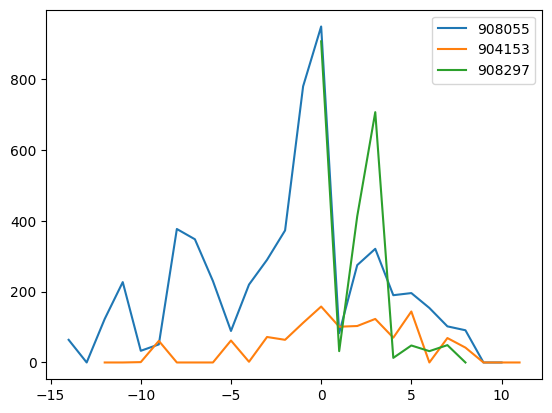

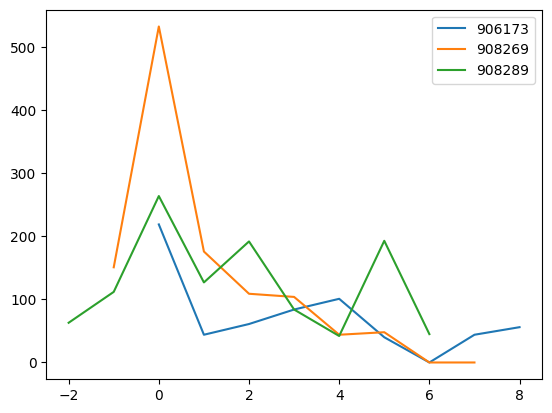

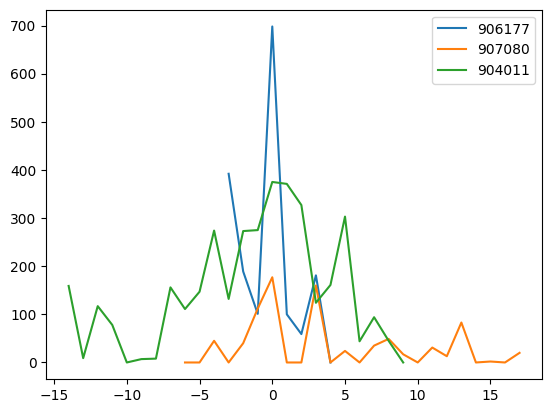

In [46]:
n_samples = 3
anoepid = '2023_24'
GerCat = 'A1'

for _ in range(5):
    filter_df = valid_samples[(valid_samples['anoepid'] == anoepid) & (valid_samples['GerCat'] == GerCat) ].pivot(index=['ano','semepi'],
                                                                            columns='narmad',
                                                                            values='novos')

    filter_df.reset_index(inplace=True,drop=True)
    filter_df =  filter_df.sample(n_samples,axis=1)
    for col in filter_df.columns:
        plot_df = filter_df[col]
        plot_df = align_series(plot_df)
        plot_df.plot(label=col)
    plt.legend()
    plt.show()


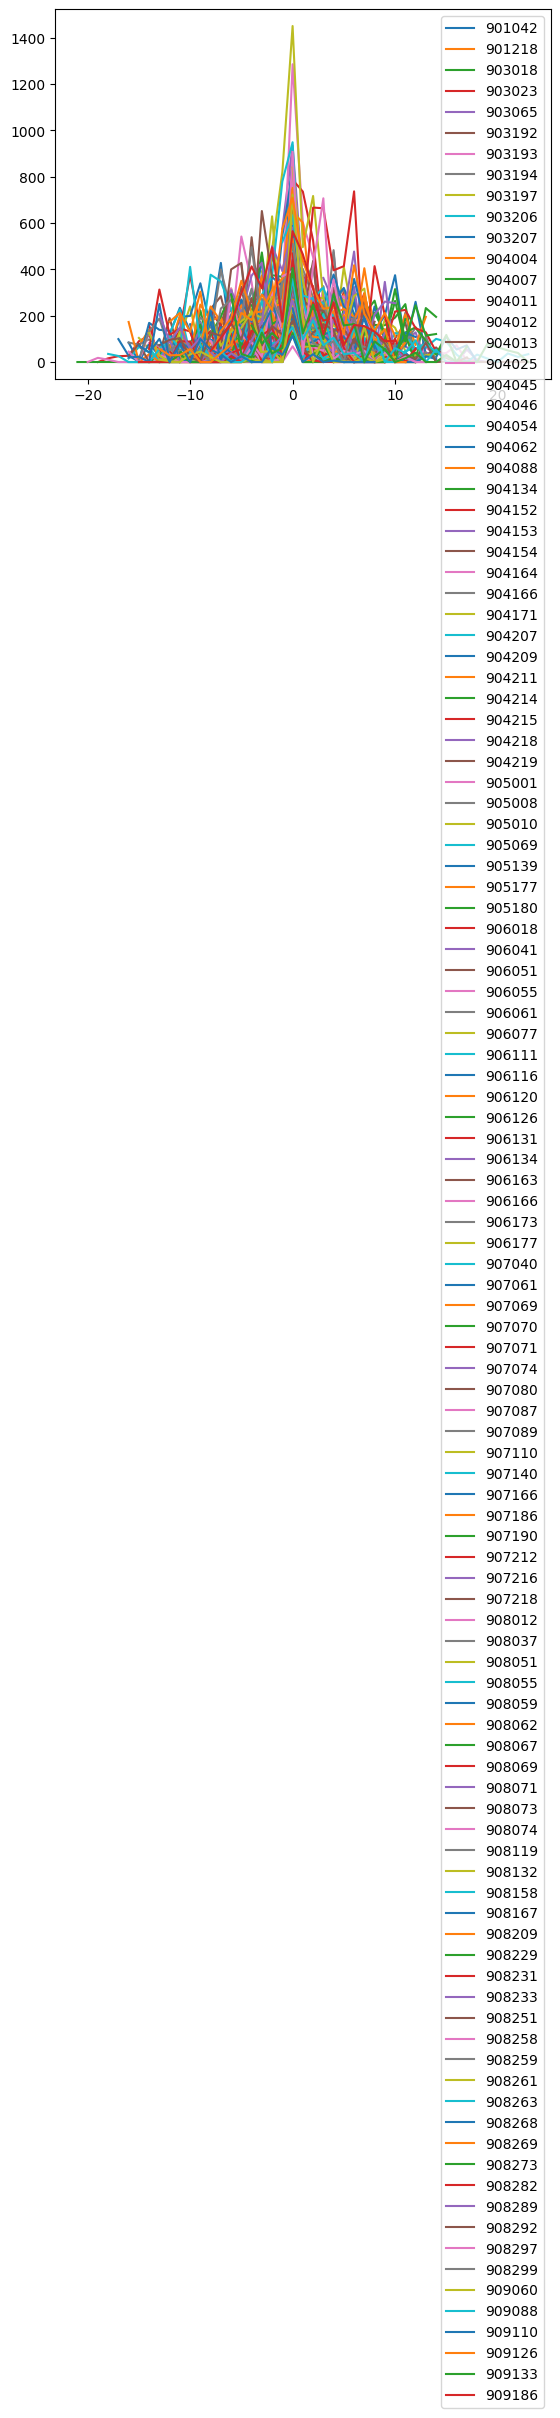

In [47]:
n_samples = 3
anoepid = '2023_24'
GerCat = 'A1'

filter_df = valid_samples[(valid_samples['anoepid'] == anoepid) & (valid_samples['GerCat'] == GerCat) ].pivot(index=['ano','semepi'],
                                                                        columns='narmad',
                                                                        values='novos')

filter_df.reset_index(inplace=True,drop=True)
for col in filter_df.columns:
    plot_df = filter_df[col]
    plot_df = align_series(plot_df)
    plot_df.plot(label=col)
plt.legend()
plt.show()

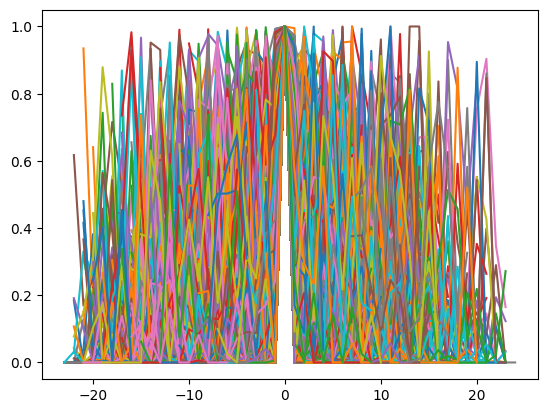

In [54]:

def align_series(series):
        max_index = series.idxmax()
        max_value = series.max()
        series.index = series.index - max_index
        series = series / max_value
        return series


n_samples = 3
anoepid = '2023_24'
GerCat = 'A2'

filter_df =(valid_samples[(valid_samples['anoepid'] == anoepid) & (valid_samples['GerCat'] == GerCat) ].pivot(index=['ano','semepi'],
                                                                        columns='narmad',
                                                                        values='novos'))

filter_df.reset_index(inplace=True,drop=True)
for col in filter_df.columns:
    plot_df = filter_df[col]
    plot_df = align_series(plot_df)
    plot_df.plot(label=col)
#plt.legend()
plt.show()

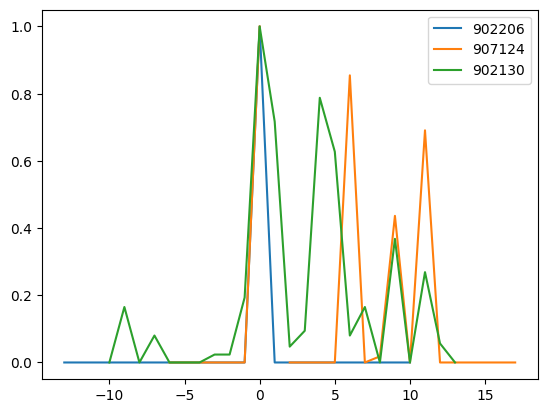

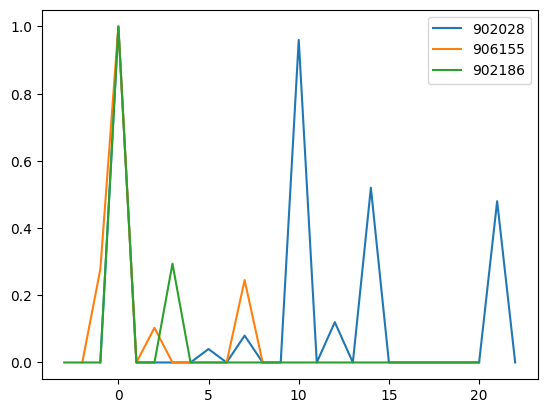

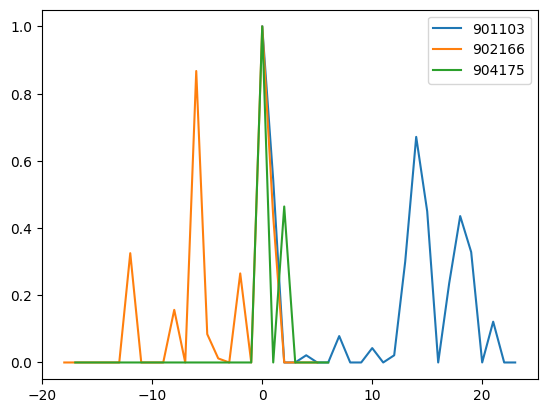

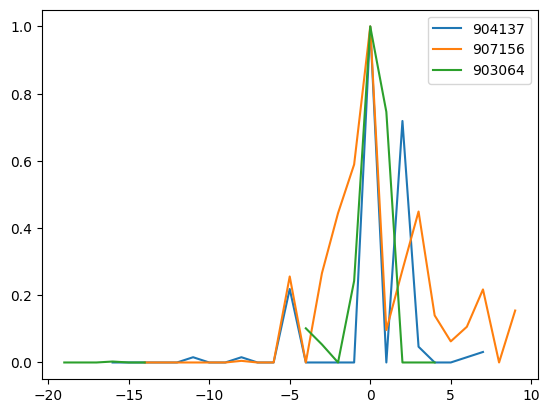

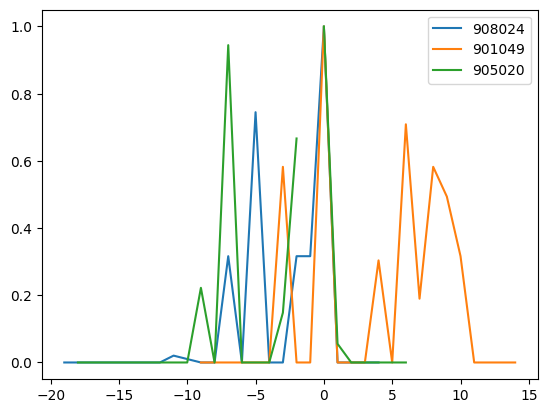

In [58]:
n_samples = 3
anoepid = '2023_24'
GerCat = 'B '

for _ in range(5):
    filter_df = valid_samples[(valid_samples['anoepid'] == anoepid) & (valid_samples['GerCat'] == GerCat) ].pivot(index=['ano','semepi'],
                                                                            columns='narmad',
                                                                            values='novos')

    filter_df.reset_index(inplace=True,drop=True)
    filter_df =  filter_df.sample(n_samples,axis=1)
    for col in filter_df.columns:
        plot_df = filter_df[col]
        plot_df = align_series(plot_df)
        plot_df.plot(label=col)
    plt.legend()
    plt.show()
